Visualisation from the numpy array saved by the training loop : 
- `input_arr.npy` : Input saved from the outputs of the last epoch
- `output_arr.npy` : output of the model from the last epoch

There are additionnal information that are saved in the those files : 
- `id.npy` : Id of the patient in numpyl
- `phase` : Phase of the input/output

In [72]:
from pathlib import Path
import numpy as np

ROOT_PATH = Path("/neurospin/dico/tsanchez/Test_BetaVAE/2025-04-28")
EXPERIMENT = "12-06-47"

inputs_arr = np.squeeze(np.load(ROOT_PATH / EXPERIMENT / "input.npy"))
outputs_arr = np.squeeze(np.load(ROOT_PATH / EXPERIMENT / "output.npy"))
phase_arr = np.squeeze(np.load(ROOT_PATH / EXPERIMENT / "phase.npy"))
id_arr = np.squeeze(np.load(ROOT_PATH / EXPERIMENT / "id.npy"))

inputs_arr.shape, outputs_arr.shape, phase_arr.shape, id_arr.shape

((18, 60, 120, 144), (18, 60, 120, 144), (18,), (18,))

In [73]:
import anatomist.headless as ana
from soma import aims

SLICE_CLIP = aims.Quaternion([0.6427876096865394,
  -0.3420201433256688,
  0.6427876096865394,
  0.3420201433256688])

VIEW_SAGITTAL = [0.5,-0.5,-0.5,0.5]
OBLIC_VIEW = [0.6,-0.2,-0.25,0.75] 

DICT_VIEWS = {
    "normal" : (
        SLICE_CLIP,
        VIEW_SAGITTAL,
        1),

    "oblic" : (
        SLICE_CLIP,
        OBLIC_VIEW,
        1)
}

anatomist = ana.Anatomist()
win = anatomist.createWindow("3D")

This plugin does not support propagateSizeHints()
This plugin does not support raise()


In [74]:
def converter_RBGA(tensor):
    np_tens = tensor.numpy()
    rgba = np.transpose(np_tens, (1,2,0))
    return rgba


In [75]:
from visualisation_anatomist import VisualiserAnatomist

visu_inputs = [converter_RBGA(VisualiserAnatomist(
    path_or_obj=np_obj, 
    dict_views= DICT_VIEWS, 
    anatomist = anatomist,
    window = win
).tensor_image("normal")) for np_obj in inputs_arr]

visu_outputs = [converter_RBGA(VisualiserAnatomist(
    path_or_obj=np_obj, 
    dict_views= DICT_VIEWS, 
    anatomist = anatomist,
    window = win
).tensor_image("normal")) for np_obj in outputs_arr]

snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL error: invalid operation
snap 1 : OpenGL 

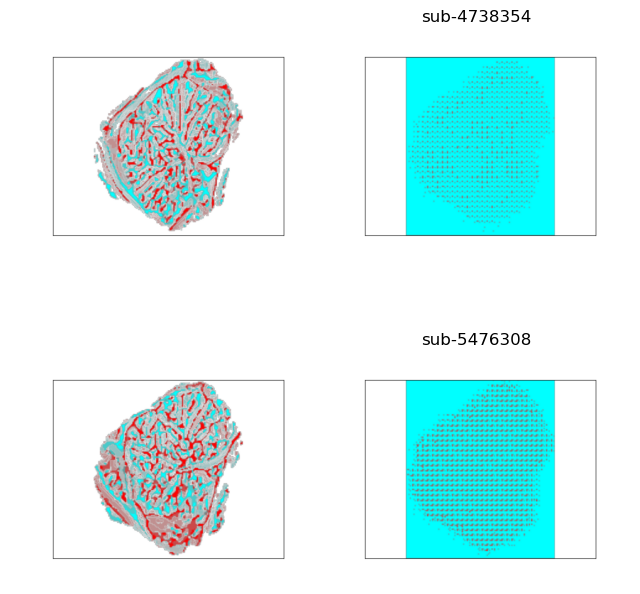

In [80]:
fig, axes = plt.subplots(2,2, figsize=(8,2*4))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[0,1].set_title(id_arr[8])
axes[0,0].imshow(visu_inputs[8], aspect="equal")
axes[0,1].imshow(visu_outputs[8], aspect="equal")

axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
axes[1,1].set_title(id_arr[7])
axes[1,0].imshow(visu_inputs[7], aspect="equal")
axes[1,1].imshow(visu_outputs[7], aspect="equal")
plt.subplots_adjust(wspace=0.01, hspace=0.1)
plt.show()

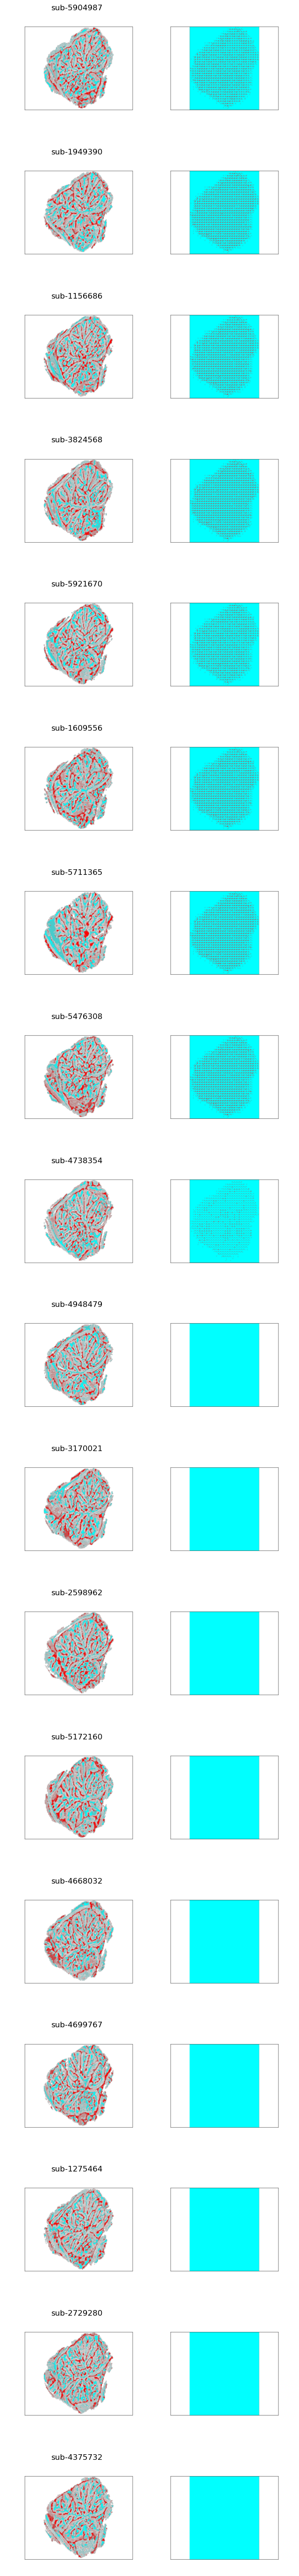

In [85]:
n_sub = len(id_arr)
fig, axes = plt.subplots(n_sub, 2, figsize=(8, n_sub*4))
for i in range(n_sub):
    axes[i,0].set_axis_off()
    axes[i,1].set_axis_off()
    axes[i,0].set_title(id_arr[i])
    axes[i,0].imshow(visu_inputs[i], aspect="equal")
    axes[i,1].imshow(visu_outputs[i], aspect="equal")
plt.subplots_adjust(wspace=0.01, hspace=0.05)